<a href="https://colab.research.google.com/github/KMate-ISD/Machine_learning/blob/main/ML_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Basics

### Iris classification problem

[scikit-learn: Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [ ]:
# import the data (50 data points of each class of irises)
from sklearn import datasets

import matplotlib.pyplot as plt
import math
import random

data_iris=datasets.load_iris()

# print(data_iris.DESCR)
print(dir(data_iris))
print(data_iris.target_names)
print(data_iris.feature_names)

for i in range(1):
  print(data_iris.data[random.randrange(0,150)])

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[5.  3.3 1.4 0.2]


### Plot data

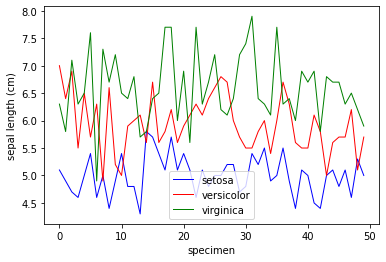

In [ ]:
x=[i for i in range(50)]

feature_value_setosa=[]
feature_value_versicolor=[]
feature_value_virginica=[]

# plot random feature
k=random.randrange(len(data_iris.feature_names))

for i in range(0,50):
  feature_value_setosa.append(data_iris.data[i][k])
  feature_value_versicolor.append(data_iris.data[i+50][k])
  feature_value_virginica.append(data_iris.data[i+100][k])

plt.plot(x, feature_value_setosa, label=data_iris.target_names[0], color='blue', linewidth=1)
plt.plot(x, feature_value_versicolor, label=data_iris.target_names[1], color='red', linewidth=1)
plt.plot(x, feature_value_virginica, label=data_iris.target_names[2], color='green', linewidth=1)

plt.legend(loc='lower center')
plt.ylabel(data_iris.feature_names[k])
plt.xlabel('specimen')

plt.show()

sepal length (cm)

average:       5.006
sumsquare:     6.088
stdev:         0.349

 4.3   4.4   4.5   4.6   4.7   4.8   4.9   5.0   5.1   5.2   5.3   5.4   5.5   5.7   5.8  
0.05  0.09  0.14  0.20  0.27  0.34  0.38  0.40  0.38  0.34  0.28  0.21  0.15  0.06  0.03  



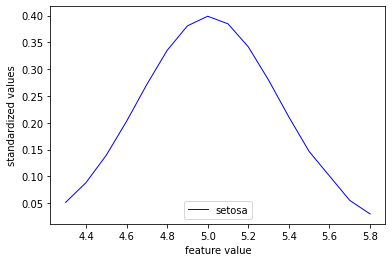

In [ ]:
print(f'{data_iris.feature_names[k]}\n')

# define standardization function
def standardize_value(x):
  return 1/math.pow(2*math.pi, 0.5)*math.pow(math.e, (-math.pow(x, 2)/2))

# sort values ascending
feature_value_setosa.sort()

# average, squared differences, sum of squared differences, standard deviation
average_feature_value_setosa=sum(feature_value_setosa, 0)/len(feature_value_setosa)
squared_differences_feature_value_setosa=[pow(i-average_feature_value_setosa,2) for i in feature_value_setosa]
sumsquare_feature_value_setosa=sum(squared_differences_feature_value_setosa)
stdev_feature_value_setosa=pow(sumsquare_feature_value_setosa/len(feature_value_setosa),0.5)

# print features
print('average:%12.3f\nsumsquare:%10.3f\nstdev:%14.3f\n'%(average_feature_value_setosa,sumsquare_feature_value_setosa,stdev_feature_value_setosa))

# standardized values
standardized_feature_value_setosa=[standardize_value((feature_value_setosa[i]-average_feature_value_setosa)/stdev_feature_value_setosa) for i in range(len(feature_value_setosa))]

# check values
for i in range(len(feature_value_setosa)):
  if feature_value_setosa[i] != feature_value_setosa[i-1]:
    print(f'{feature_value_setosa[i]:4.1f}', end="  ")
print()
for i in range(len(feature_value_setosa)):
  if feature_value_setosa[i] != feature_value_setosa[i-1]:
    print(f'{standardized_feature_value_setosa[i]:4.2f}', end="  ")
print('\n')

plt.plot(feature_value_setosa, standardized_feature_value_setosa, label=data_iris.target_names[0], color='blue', linewidth=1)
plt.legend(loc='lower center')
plt.ylabel('standardized values')
plt.xlabel('feature value')
plt.show()

### Scatter plotting data

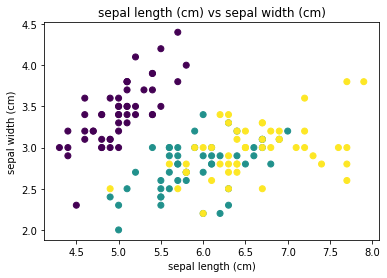

In [105]:
# plot sepal length over sepal width

# make slice

data_scatter=data_iris.data[:,:2]

# grouping variable
grouping_variable=data_iris.target[:]

plt.scatter(data_scatter[:,0], data_scatter[:,1], c=grouping_variable)
plt.xlabel(data_iris.feature_names[0])
plt.ylabel(data_iris.feature_names[1])
plt.title(f'{data_iris.feature_names[0]} vs {data_iris.feature_names[1]}')
plt.show()